<a href="https://colab.research.google.com/github/Muzi-HS/2023ML/blob/main/HW4_201821182_%EC%A0%95%ED%98%84%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW4

이번 과제는 Neural Network에 관한 내용을 담고 있습니다.   
Pytorch를 이용하여 DNN과 CNN 모델을 구현하고 학습 시켜봅시다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 문제 1,2,3 - Deep Neural Network

## 문제 1-1
Tangent Hyperbolic(tanh) 출력을 포함하는  class Mytanh의 forward 함수를 작성하세요.(활성화 함수로 사용)

In [2]:
class Mytanh:
    def __init__(self):
        self.params = []

    def forward(self, x):
      ################### 문제 1-1 ##############
      ############# Tanh forward 구현 ###########
      output = np.tanh(x)
      return output

      
      #############################################

In [3]:
#작성한 mytanh를 테스트 해 봅니다
tanh = Mytanh()
print(tanh.forward(0.1))

0.09966799462495582


## 문제 1-2 & 문제 1-3

다음은 Or (논리)연산을 위한 신경망 코드의 일부이며 Forward propagation, Back-Propagation, Prediction에 관한 내용을 담고 있습니다.

In [4]:
# 예제 데이터 
X=np.array([[0,0,1,1],[0,1,0,1]])
y=np.array([[0,1,1,1]])

# Number of inputs, output, Hidden
InputDim = 2
OutputDim = 1
HiddenDim = 2

Sample_size = len(X[0])
learning_rate = 0.1 # Learning rate
epochs = 10000
losses = []

Neural Network를 위한 가중치 행렬(Weight과 Bias)을 정의하고 초기화 합니다. 

In [5]:
# Define weight matrices for neural network
Weight1 = np.random.rand(HiddenDim,InputDim)  
Weight2 = np.random.rand(OutputDim,HiddenDim)  
Bias1 = np.random.rand(HiddenDim,1)
Bias2 = np.random.rand(OutputDim,1)

우리가 만든 신경망의 Forward propagation을 위한 함수는 다음과 같습니다. (sigmoid 활성화 함수를 사용합니다)

In [6]:
def sigmoid(z):
    z= 1/(1+np.exp(-z))
    return z

# Forward propagation
def forward_prop(Weight1,Weight2,Bias1,Bias2, X):
    Hidden1 = np.dot(Weight1,X) + Bias1
    Prob1 = sigmoid(Hidden1)    
    Hidden2 = np.dot(Weight2,Prob1)+ Bias2
    Prob2 = sigmoid(Hidden2)
    return Hidden1,Prob1,Hidden2,Prob2

## 문제 1-2
아래 코드틀의 빈칸에 Back propagation을 하는 코드를 작성하세요.


*   Hint: Hidden2, Weight2, Hidden1, Weight1의 gradient 계산



## 문제 1-3
아래 코드틀의 빈칸에 Weight update를 하는 코드를 작성하세요.

In [7]:
for i in range(epochs):
    Hidden1,Prob1,Hidden2,Prob2 = forward_prop(Weight1,Weight2,Bias1,Bias2,X)
    loss = -(1/Sample_size)*np.sum(y*np.log(Prob2)+(1-y)*np.log(1-Prob2))
    losses.append(loss)
    ####################################################
    ############ 문제 1-2 Back-Propagation ##############
    ####################################################
    dHidden2 = Prob2 - y
    dWeight2 = (1/Sample_size) * np.dot(dHidden2, Prob1.T)
    dBias2 = (1/Sample_size) * np.sum(dHidden2, axis=1, keepdims=True)

    dHidden1 = np.dot(Weight2.T, dHidden2) * Prob1 * (1 - Prob1)
    dWeight1 = (1/Sample_size) * np.dot(dHidden1, X.T)
    dBias1 = (1/Sample_size) * np.sum(dHidden1, axis=1, keepdims=True)

    ####################################################

    ####################################################
    ############## 문제 1-3 Weight Update ############### 
    ####################################################
    Weight2 -= learning_rate * dWeight2
    Bias2 -= learning_rate * dBias2
    Weight1 -= learning_rate * dWeight1
    Bias1 -= learning_rate * dBias1






    
    ####################################################
    
    

Epoch에 따른 Loss 값들을 그려보며, 훈련 진행 상황을 확인합니다

Text(0, 0.5, 'Loss')

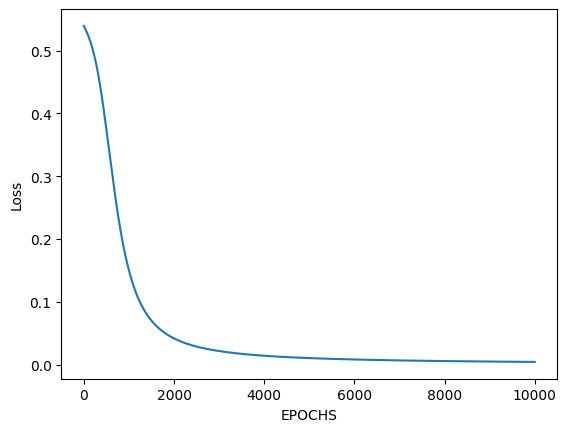

In [8]:
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss")

## 문제 1-4
아래 코드틀에 우리가 훈련한 신경망에 대하여 데이터를 넣어 test하는 코드를 작성하세요. 


*   Forward_prop을 이용하여 input (1, 0), (0, 0), (0, 1), (1, 1) 에 대한 예측값(0또는 1)을 도출합니다.
*   Hint : Forward_prop 마지막 확률값이 0.5 이상이면 1, 아니면 0으로 예측합니다


In [9]:
test1 = np.array([[1],[0]])
test2 = np.array([[0],[0]])
test3 = np.array([[0],[1]])
test4 = np.array([[1],[1]])

######################## 문제 1-4  #########################
def predict(Weight1, Weight2, Bias1, Bias2, X):
    _, _, _, Prob2 = forward_prop(Weight1, Weight2, Bias1, Bias2, X)
    predictions = np.where(Prob2 >= 0.5, 1, 0)
    return predictions

prediction1 = predict(Weight1, Weight2, Bias1, Bias2, test1)
prediction2 = predict(Weight1, Weight2, Bias1, Bias2, test2)
prediction3 = predict(Weight1, Weight2, Bias1, Bias2, test3)
prediction4 = predict(Weight1, Weight2, Bias1, Bias2, test4)

print("Test 1 Prediction:", prediction1)
print("Test 2 Prediction:", prediction2)
print("Test 3 Prediction:", prediction3)
print("Test 4 Prediction:", prediction4)






############################################################

Test 1 Prediction: [[1]]
Test 2 Prediction: [[0]]
Test 3 Prediction: [[1]]
Test 4 Prediction: [[1]]


# 문제 2 - Implementing DNN using Pytorch
문제 1에서는 Numpy만을 이용하여 DNN의 구조와 구현에 대해 알아보았습니다.  
문제 2에서는 Pytorch를 사용하여 신경망을 구현하고 MNIST 데이터로 분류 모델을 실습합니다.  
코드 참고 : Pytorch Tutorial(https://tutorials.pytorch.kr/beginner/basics/quickstart_tutorial.html)

In [10]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Pytorch에서는 기초 데이터 처리를 위하여, Tensor라는 자료형을 주로 사용합니다. 필요한 모듈을 inport해 줍니다.

In [11]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import torch.nn.functional as F
import torchvision.datasets as dsets

Pytorch를 이용하여 신경망을 만들기 위해 torch.nn 패키지를 이용합니다.,이는 신경망 설계를 위한 기초 클래스이며,  nn.Module을 상속하여 override합니다.

In [12]:
class MySampleNetwork(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.lin1 = nn.linear(1, 20, 5)
        self.lin2 = nn.linear(20, 20, 5)

    def forward(self, x):
        x = F.relu(self.lin1(x))
        return F.relu(self.lin2(x))

MNIST는 기계 학습을 공부하기 위한 예제로 자주 활용되는 dataset으로, Training data 6만개, Test Data의 1만개의 28*28 손글씨 숫자 이미지로 구성되어 있습니다. torchvision.datasets에 MNIST 데이터가 포함되어 있어 아래와 같은 코드로 쉽게 데이터를 로드할 수 있습니다.

In [13]:
# MNIST dataset
training_data = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

test_data = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 90911043.71it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 20297535.83it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24996083.54it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2979904.39it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



Model 구축에 필요한 hyperparameter(Epochs, Batch size, Learning rate, loss function)를 설정해 줍니다  

In [14]:
# hyperparameter 설정
import torch.optim as optim

# hyperparameters
training_epochs = 5
batch_size = 100
learning_rate=0.005
criterion = torch.nn.CrossEntropyLoss()

Pytorch의 Dataloader, 데이터를 다루고 모델을 훈련 및 시험하기 위하여 가장 주의를 기울여야 될 부분 중의 하나입니다.  Dataset을 Minibatch 형태로 만들어 주며, Batch size나, Shuffle 여부에 대한 것들을 설정할 수 있습니다.

In [15]:
# data loader
# train, test 각각의 data loader 생성
train_loader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

for X, y in test_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([100, 1, 28, 28])
Shape of y: torch.Size([100]) torch.int64


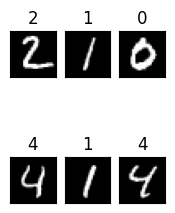

In [16]:
#TestData의 일부를 출력해 봅니다.
row = 2
column =3
fig=plt.figure(figsize=(row, column),dpi=100)
for i in range(1, row*column+1):
    img = test_data.data[i].reshape(28,28)
    ax = fig.add_subplot(row, column, i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.title.set_text(test_data.targets.cpu().numpy()[i])
    
    plt.imshow(img,cmap='gray')
plt.show()

## 문제 2-1
nn.Linear를 이용하여, 784의 입력 데이터에 대해 200차원의 출력값을 갖는 첫 번째 hidden layer(layer1), 100차원을 갖는 두 번째 layer(layer2), 그리고 10차원을 갖는 세 번째(마지막) layer(layer3)를 보유한 Class Mymodel을 완성합니다. (Hidden layer의 활성화 함수는 F.relu를 이용합니다.)

## 문제 2-2
아래 코드틀에서 forward 부분을 작성하세요.

In [17]:
import torch.nn as nn
import torch.nn.functional as F

class Mymodel(nn.Module):
    def __init__(self):
        super(Mymodel, self).__init__()
        self.flatten = nn.Flatten()
        ###################################################
        ################### 문제 2-1 #######################
        self.linear1 = nn.Linear(784, 200)
        self.linear2 = nn.Linear(200, 100)
        self.linear3 = nn.Linear(100, 10)



        ###################################################
        
    def forward(self,X):
        X = self.flatten(X)
        ###################################################
        ################### 문제 2-2 #######################
        X = F.relu(self.linear1(X))
        X = F.relu(self.linear2(X))
        X = self.linear3(X) 


        ###################################################
        return F.log_softmax(X, dim=1)
    

설계한 모델의 구조를 확인합니다.

In [18]:
model = Mymodel()
print(model)

Mymodel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=784, out_features=200, bias=True)
  (linear2): Linear(in_features=200, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=10, bias=True)
)


Model 훈련에 필요한 optimizer를 설정해 줍니다.Optimizer는 Adam Optimizer를 사용합니다.

In [19]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Model을 훈련시킵니다. GPU를 활용하고 싶다면, 다음의 코드를 주석 해제 하여 GPU 옵션을 지정합니다. GPU를 활용할 때에는 모델에 입력하는 모든 데이터가 GPU에 로드되어 있어야 합니다.

In [20]:
# colab에서 '런타임 유형 변경'을 하면 gpu 사용할 수 있음
#device = "cuda" if torch.cuda.is_available() else "cpu"
#print(f"Using {device} device")

In [21]:
training_epochs = 5
for epoch in range(training_epochs): # training_epochs 수만큼 반복
    avg_loss = 0
    for X_train, target in train_loader:
        pred = model(X_train) # 
        optimizer.zero_grad() 
        loss = criterion(pred, target) # Model output과 target 비교
        loss.backward() # gradient 계산
        optimizer.step() # parameter 업데이트
        avg_loss += loss / len(train_loader) 
    print('[Epoch: {:>3}] loss = {:>.9}'.format(epoch + 1, avg_loss))
 

[Epoch:   1] loss = 0.233960301
[Epoch:   2] loss = 0.102969095
[Epoch:   3] loss = 0.0772484317
[Epoch:   4] loss = 0.0628036112
[Epoch:   5] loss = 0.0540451892


## 문제 2-3
위에서 훈련한 모델을 Test하고자 합니다. 다음의 빈 칸을 채워, Test Accuracy를 계산하는 함수(Mytest)의 코드를 완성합니다.  
(Hint : X_test를 모델에 통과시키고 정답을 맞추었는지 확인 후, 맞은 비율을 계산하여 백분율로 나타냅니다)

In [22]:
def Mytest(model, testloader):
    model.eval()
    with torch.no_grad(): 
        correct = 0
        total = 0
        for X_test, target in test_loader:
            out = model(X_test.data)
            #print(out, 1)
            ###################################################
            ################### 문제 2-3 #######################
            predicted = torch.max(out.data, 1)[1]
            total += target.size(0)
            correct += (predicted == target).float().sum().item()
        test_acc = correct / total * 100
            ####################################################     
    return test_acc


print('Test Accuracy: ', Mytest(model, test_loader))

Test Accuracy:  97.21


# 문제 3 - CNN
CNN을 구현하여 MNIST 데이터로 모델을 학습시켜 봅시다.  
DNN과 CNN이 어떻게 다른지 비교하면서 과제를 수행해보세요. 

In [23]:
import torch
torch.manual_seed(17) # 전체 seed 설정

### Data Augmentation

import torchvision
from torchvision import transforms

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import torch.nn.functional as F
import torchvision.datasets as dsets

In [24]:
# transform을 통해 이미지를 변형시켜 data augmentation을 적용합니다.

custom_transform = transforms.Compose([
  transforms.RandomRotation(degrees=(0, 180)),
  transforms.ToTensor(),
])

In [25]:
# MNIST dataset
training_data = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=custom_transform, # transform 적용하여 데이터 불러오기
                          download=True)

test_data = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=custom_transform, # transform 적용하여 데이터 불러오기
                         download=True)


### Define Dataloader

In [26]:
# data loader
# train, test 각각의 data loader 생성
batch_size = 16
train_loader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

### Transformed image visualization

In [27]:
import matplotlib.pyplot as plt
import numpy as np

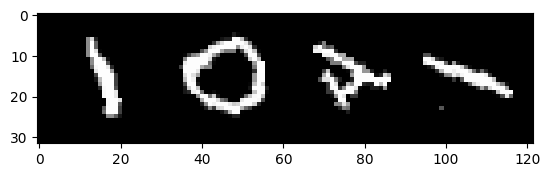

In [28]:
# functions to show an image

train_loader_ = torch.utils.data.DataLoader(training_data, batch_size=4, shuffle=True)
def imshow(img):
    # img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader_)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))


## 문제 3-1. Define a CNN architecture
아래 주어진 ```class Net```에서 forward 함수를 참고하여 init 함수에 있는 빈칸에 layer를 정의하세요.  


*   conv2d 함수에서 kernel_size=3으로 설정해주세요.



In [29]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        ###############################
        ########## 문제 3-1 ############
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3)  # First convolutional layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3)  # Second convolutional layer
        self.fc = nn.Linear(in_features=16 * 5 * 5, out_features=10)  # Fully connected layer
        ###############################
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.nn.Flatten()(x) # flatten all dimensions except batch
        x = self.fc(x)
        return x

net = Net()

In [30]:
# cpu OR gpu 설정
# gpu가 있을 경우, device로 cuda를 사용함
# colab에서 '런타임 유형 변경'을 하면 gpu 사용할 수 있음
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [31]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.005)

In [32]:
net = net.to(device) # device로 Network 전송
print(net) # 모델 구조 확인

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc): Linear(in_features=400, out_features=10, bias=True)
)


In [33]:
# training
EPOCHS = 20
for epoch in range(EPOCHS): # epochs수만큼 반복
    avg_loss = 0
    for data, target in train_loader:
        # print(data.shape)
        data = data.cuda() # 데이터도 gpu로 보내야함
        target = target.cuda()
        pred = net(data) # 
        # print(pred)
        optimizer.zero_grad() 
        loss = criterion(pred, target) # Model output과 target 비교
        loss.backward() # gradient 계산
        optimizer.step() # parameter 업데이트
        avg_loss += loss / len(train_loader) 
    print('[Epoch: {:>4}] loss = {:>.9}'.format(epoch + 1, avg_loss))

[Epoch:    1] loss = 0.439845234
[Epoch:    2] loss = 0.289331973
[Epoch:    3] loss = 0.256095499
[Epoch:    4] loss = 0.247957498
[Epoch:    5] loss = 0.241689488
[Epoch:    6] loss = 0.233406812
[Epoch:    7] loss = 0.23034969
[Epoch:    8] loss = 0.226183191
[Epoch:    9] loss = 0.226259425
[Epoch:   10] loss = 0.225093767
[Epoch:   11] loss = 0.223059013
[Epoch:   12] loss = 0.220194221
[Epoch:   13] loss = 0.217036217
[Epoch:   14] loss = 0.218536794
[Epoch:   15] loss = 0.214600474
[Epoch:   16] loss = 0.217539281
[Epoch:   17] loss = 0.214913562
[Epoch:   18] loss = 0.214567587
[Epoch:   19] loss = 0.213470772
[Epoch:   20] loss = 0.216539592


In [34]:
net.to("cpu") 
# gpu로 학습된 모델을 cpu로 보내기 
# (Mytest()는 cpu에서 작동, Mytest()의 데이터와 타겟을 gpu로 보낼 수 있도록 코드를 수정하면 모델을 gpu에 두고도 테스트 가능)

net.eval()
print('Test Accuracy: ', Mytest(net, test_loader))

Test Accuracy:  94.15


## 문제 3-2
강의노트에 있는 regularization 기법 증 한 가지 이상 사용하고 hyper-parameter(kernel size, layer 수 등) 한 가지 이상을 tuning하여 모델의 정확도가 94% 이상이 되도록 향상시키세요.
* Net()을 자유롭게 수정 가능
* 모델을 고정시키기 위해 ```torch.manual_seed()``` 사용 가능 
* 정확도가 98% 이상이면 가산점 부여

In [46]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3)  # First convolutional layer
        self.dropout1 = nn.Dropout2d(0.2)  # Dropout after first convolutional layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3)  # Second convolutional layer
        self.dropout2 = nn.Dropout2d(0.2)  # Dropout after second convolutional layer
        self.fc1 = nn.Linear(in_features=24 * 5 * 5, out_features=120)  # First fully connected layer
        self.fc2 = nn.Linear(in_features=120, out_features=84)  # Second fully connected layer
        self.fc3 = nn.Linear(in_features=84, out_features=10)  # Third fully connected layer
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout2(x)
        x = x.view(-1, 24 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [47]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [48]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.005)

In [49]:
net = net.to(device) # device로 Network 전송
print(net) # 모델 구조 확인

Net(
  (conv1): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.2, inplace=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (dropout2): Dropout2d(p=0.2, inplace=False)
  (fc1): Linear(in_features=600, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [50]:
# training
EPOCHS = 20
for epoch in range(EPOCHS): # epochs수만큼 반복
    avg_loss = 0
    for data, target in train_loader:
        # print(data.shape)
        data = data.cuda() # 데이터도 gpu로 보내야함
        target = target.cuda()
        pred = net(data) # 
        # print(pred)
        optimizer.zero_grad() 
        loss = criterion(pred, target) # Model output과 target 비교
        loss.backward() # gradient 계산
        optimizer.step() # parameter 업데이트
        avg_loss += loss / len(train_loader) 
    print('[Epoch: {:>4}] loss = {:>.9}'.format(epoch + 1, avg_loss))

[Epoch:    1] loss = 0.521300912
[Epoch:    2] loss = 0.315302044
[Epoch:    3] loss = 0.294844747
[Epoch:    4] loss = 0.281465679
[Epoch:    5] loss = 0.278290242
[Epoch:    6] loss = 0.269367129
[Epoch:    7] loss = 0.261532962
[Epoch:    8] loss = 0.25563857
[Epoch:    9] loss = 0.254329681
[Epoch:   10] loss = 0.254378676
[Epoch:   11] loss = 0.251619875
[Epoch:   12] loss = 0.249569342
[Epoch:   13] loss = 0.247886822
[Epoch:   14] loss = 0.244001687
[Epoch:   15] loss = 0.253837645
[Epoch:   16] loss = 0.253808141
[Epoch:   17] loss = 0.244596809
[Epoch:   18] loss = 0.242623806
[Epoch:   19] loss = 0.246153563
[Epoch:   20] loss = 0.242197648


In [51]:
net.to('cpu')
net.eval()
print('Test Accuracy: ', Mytest(net, test_loader))

Test Accuracy:  96.26
